In [2]:
import pickle
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

2024-06-16 17:13:52.025233: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-16 17:13:52.029121: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-16 17:13:52.227755: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-16 17:13:53.046807: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-16 17:13:54.678805: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [3]:
# Loading the data
picke_in = open("dataset/shrinked/X.pickle", "rb")
X = pickle.load(picke_in)
picke_in.close()

picke_in = open("dataset/shrinked/y.pickle", "rb")
y = pickle.load(picke_in)
picke_in.close()

# Normalizing the features
X = X / 255.0

# Converting labels to categorical
y = tf.keras.utils.to_categorical(y, num_classes=3)

# Spliting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Building the model
model = Sequential([
    Flatten(input_shape=(50, 50, 1)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax'),
    
])

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

/home/rei/.local/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# Training the model
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_val, y_val))


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9034 - loss: 0.2428 - val_accuracy: 0.9227 - val_loss: 0.1876
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9237 - loss: 0.2262 - val_accuracy: 0.9227 - val_loss: 0.1761
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8910 - loss: 0.2431 - val_accuracy: 0.9330 - val_loss: 0.1788
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9291 - loss: 0.2084 - val_accuracy: 0.9330 - val_loss: 0.1725
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9272 - loss: 0.2322 - val_accuracy: 0.9330 - val_loss: 0.1739
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9136 - loss: 0.2405 - val_accuracy: 0.8969 - val_loss: 0.2215
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9015 - loss: 0.2269 - val_accuracy: 0.9330 - val_loss: 0.1672
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9320 - loss: 0.1830 - val_accuracy: 0.9381 - val_los

In [6]:
# Evaluating the model
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation loss: {val_loss}")
print(f'Validation accuracy: {val_acc * 100:.2f}%')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8801 - loss: 0.2120 
Validation loss: 0.2309207320213318
Validation accuracy: 87.63%


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 2500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       320,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 985,739 (3.76 MB)

 Trainable params: 328,579 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 657,160 (2.51 MB)

In [7]:
model.save('water_bottle_classifier_only_dense_layer.h5')

{'accuracy': [0.9122580885887146, 0.9238709807395935, 0.9083871245384216, 0.9251613020896912, 0.9303225874900818, 0.9161290526390076, 0.9148387312889099, 0.9329032301902771, 0.9174193739891052, 0.9341935515403748, 0.9251613020896912, 0.9174193739891052, 0.9341935515403748, 0.9316129088401794, 0.9187096953392029, 0.9316129088401794, 0.9316129088401794, 0.9354838728904724, 0.9187096953392029, 0.9238709807395935, 0.9290322661399841, 0.9329032301902771, 0.9380645155906677, 0.9329032301902771, 0.9316129088401794, 0.940645158290863, 0.9225806593894958, 0.9458064436912537, 0.9380645155906677, 0.9535483717918396, 0.944516122341156, 0.9458064436912537, 0.9548386931419373, 0.9380645155906677, 0.9522580504417419, 0.9535483717918396, 0.9341935515403748, 0.9380645155906677, 0.9419354796409607, 0.9432258009910583, 0.944516122341156, 0.9419354796409607, 0.9419354796409607, 0.9470967650413513, 0.9470967650413513, 0.9612902998924255, 0.9587096571922302, 0.9548386931419373, 0.9561290144920349, 0.9612902

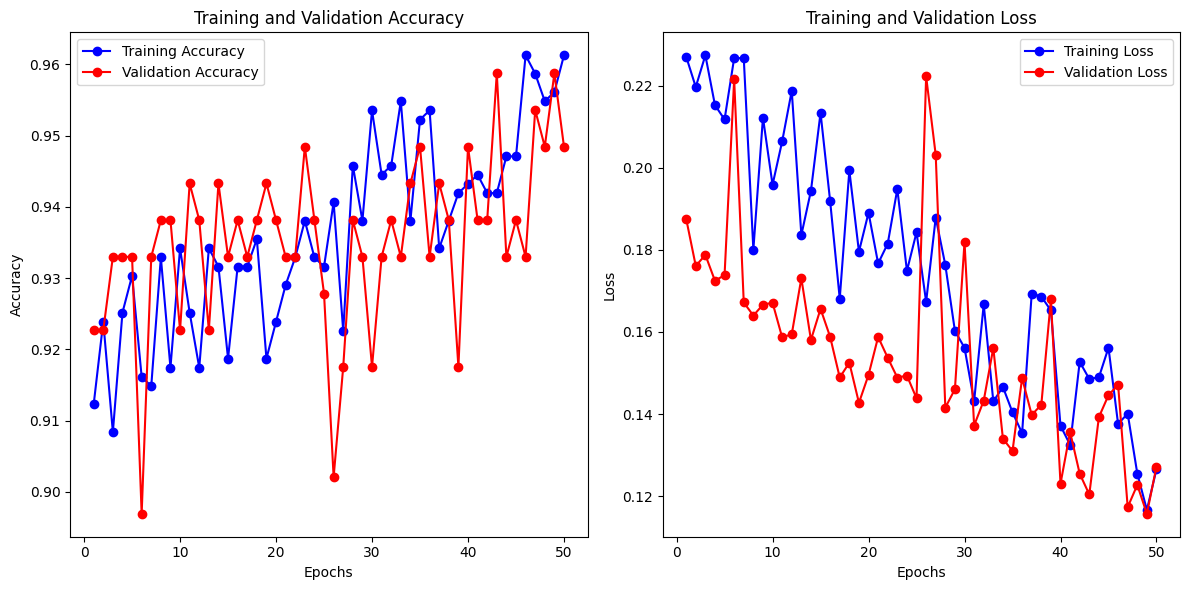

In [18]:
epochs = range(1, 51)

plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], 'bo-', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], 'bo-', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
